<a href="https://colab.research.google.com/github/Akash-sh/Analysing_and_Predicting_StockMarket_using_LSTM_and_YFinance/blob/main/stock_market_analysis_prediction_using_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysing and Predicting Stock Market using LSTM and YFinance

In this notebook, we'll explore time series data from the stock market, focusing on technology giants like Apple, Amazon, Google, and Tesla. By utilizing the `yfinance` library for data retrieval and Seaborn/Matplotlib for visualization, we aim to answer key questions and predict stock behaviors.

Our exploration will cover:

1. **Price Changes Over Time:** How have stock prices evolved?
2. **Average Daily Returns:** What's the typical daily return?
3. **Moving Averages:** How do trends smooth out?
4. **Inter-Stock Correlation:** Are there correlations between companies?
5. **Quantifying Risk:** How do we measure investment risk?
6. **Predictive Modeling:** Can LSTM predict Tesla's closing prices?

## Data Collection

We'll start by gathering data through the `yfinance` library, which offers a Pythonic way to fetch Yahoo Finance market data. Our analysis will showcase the power of time series data in understanding stock markets.

Let's begin our journey into stock market analysis!


## 1. Price Change Over Time

In this section, we'll explore how to request and analyze stock information using pandas. We'll focus on fundamental attributes of stocks, particularly their price changes over time.

### Stock Price Analysis

Our analysis begins by fetching historical stock price data using pandas. By visualizing these price movements, we can uncover trends and fluctuations that provide insights into a stock's past performance.

We'll leverage pandas to calculate metrics like daily returns and moving averages. These insights will guide us in making informed decisions and predictions about future stock behavior.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'TSLA', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'TSLA', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, TSLA, AMZN]
company_name = ["APPLE", "GOOGLE", "TESLA", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-08-11,137.399994,139.330002,137.000000,138.410004,138.410004,42832100,AMAZON
2023-08-14,138.300003,140.589996,137.750000,140.570007,140.570007,47148700,AMAZON
2023-08-15,140.050003,141.279999,137.229996,137.669998,137.669998,42781500,AMAZON
2023-08-16,137.190002,137.270004,135.009995,135.070007,135.070007,41675900,AMAZON
2023-08-17,135.460007,136.089996,133.529999,133.979996,133.979996,48354100,AMAZON
2023-08-18,131.619995,134.070007,131.149994,133.220001,133.220001,48469400,AMAZON
2023-08-21,133.740005,135.190002,132.710007,134.679993,134.679993,41442500,AMAZON
2023-08-22,135.080002,135.649994,133.729996,134.250000,134.250000,32935100,AMAZON
2023-08-23,134.500000,135.949997,133.220001,135.520004,135.520004,42673700,AMAZON


After inspecting our dataset, we observe numeric data indexed by dates. Notably, weekends are excluded.

### Exploring the Data

## Descriptive Statistics for the Data

The `.describe()` method generates descriptive statistics. These statistics offer a summary of a dataset's central tendency, spread, and distribution shape. Notably, it excludes `NaN` (missing) values.

This method can analyze both numeric and object series, along with sets of `DataFrame` columns featuring mixed data types. The output's nature depends on the data provided. For more detailed insights, refer to the notes below.

In [2]:
# Summary Stats
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,209.393307,213.882288,204.466429,209.197487,209.197487,1.265262e+08
std,49.054679,49.423989,48.516284,48.865394,48.865394,4.809155e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,3.264580e+07
25%,176.902500,182.459999,172.507496,178.762501,178.762501,9.220765e+07
50%,198.919998,203.474998,193.599998,197.684998,197.684998,1.215680e+08
75%,250.582504,257.717499,244.694996,250.520004,250.520004,1.598709e+08
max,308.290009,313.799988,305.579987,309.070007,309.070007,3.065906e+08


Keep in mind that our dataset comprises just 255 records over the span of one year. This limitation arises from the omission of weekends in the data.

In [3]:
# General info
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-08-24 to 2023-08-24
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


## Closing Price

The closing price represents the final price at which a stock is traded within the regular trading session. It holds significant importance as a standard benchmark for investors to monitor the stock's performance over time. By observing changes in the closing price, investors can gain insights into market trends and make informed decisions about buying or selling.

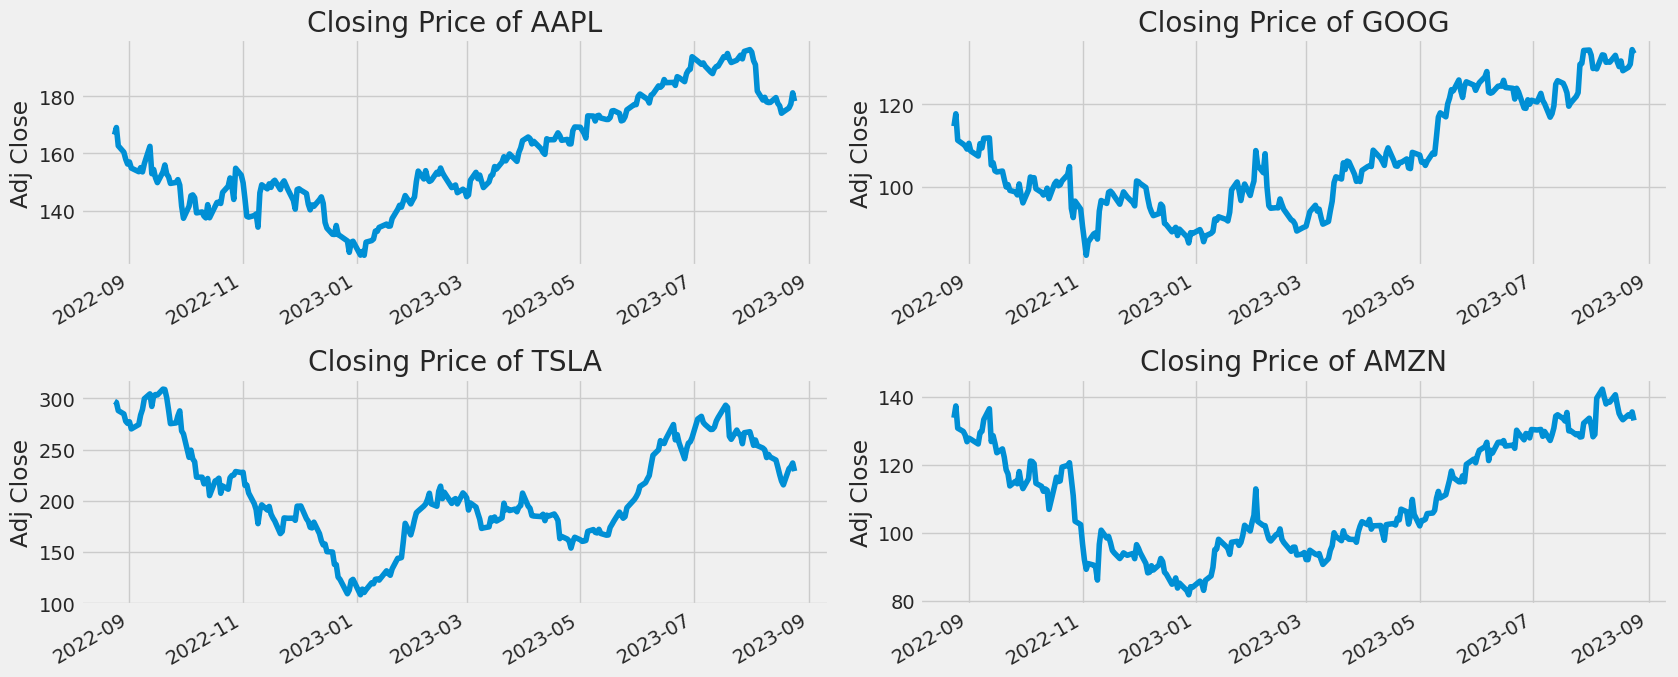

In [4]:
# Let's see a historical view of the closing price
plt.figure(figsize=(17, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

## Volume of Sales

In stock trading, volume pertains to the quantity of an asset or security that undergoes transactions over a specific timeframe, frequently within a single day. For instance, stock trading volume signifies the total count of shares traded between the daily opening and closing periods.

Volume holds significant relevance for technical traders as it provides crucial insights into market dynamics. Changes in trading volume over time serve as vital inputs for making informed decisions about trading strategies. By analyzing trading volume, traders can identify trends, confirm price movements, and devise effective trading plans.


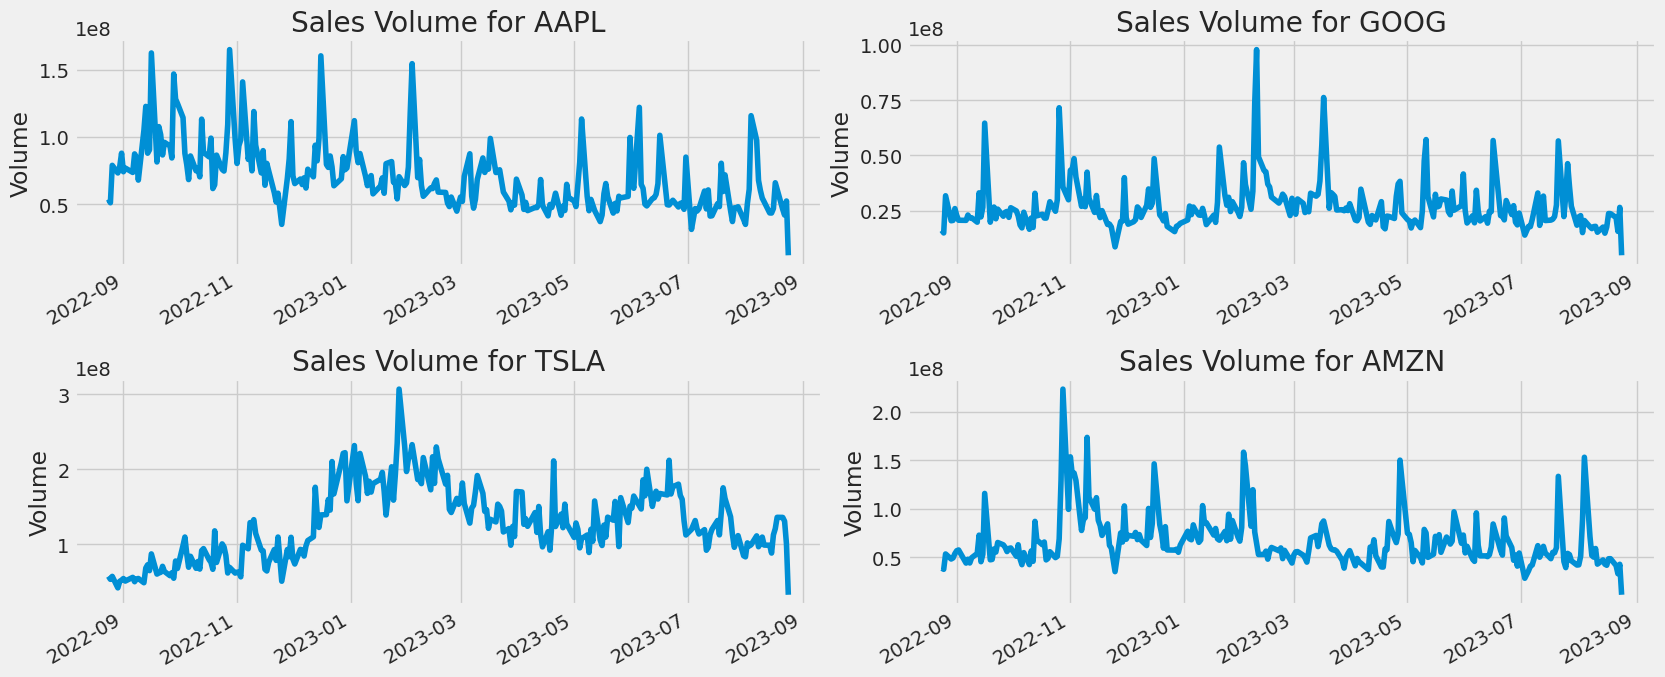

In [5]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(17, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

Having explored visualizations of both the closing price and daily trading volume, let's now shift our focus to a crucial metric: calculating the moving average for the stock.

### Calculating Moving Averages

In the following sections, we'll delve into the process of calculating moving averages and leverage them to enhance our understanding of the stock's performance.

## 2. Moving Averages of Stocks

Moving averages (MA) are essential tools in technical analysis, providing insights into price trends. They create adaptable average prices over specific timeframes, such as days, minutes, or weeks.

### Understanding Moving Averages

MA smoothens price data, filtering short-term fluctuations to reveal broader trends. This aids in pinpointing turning points and major shifts. Through calculating moving averages, we gain insights into stock performance.

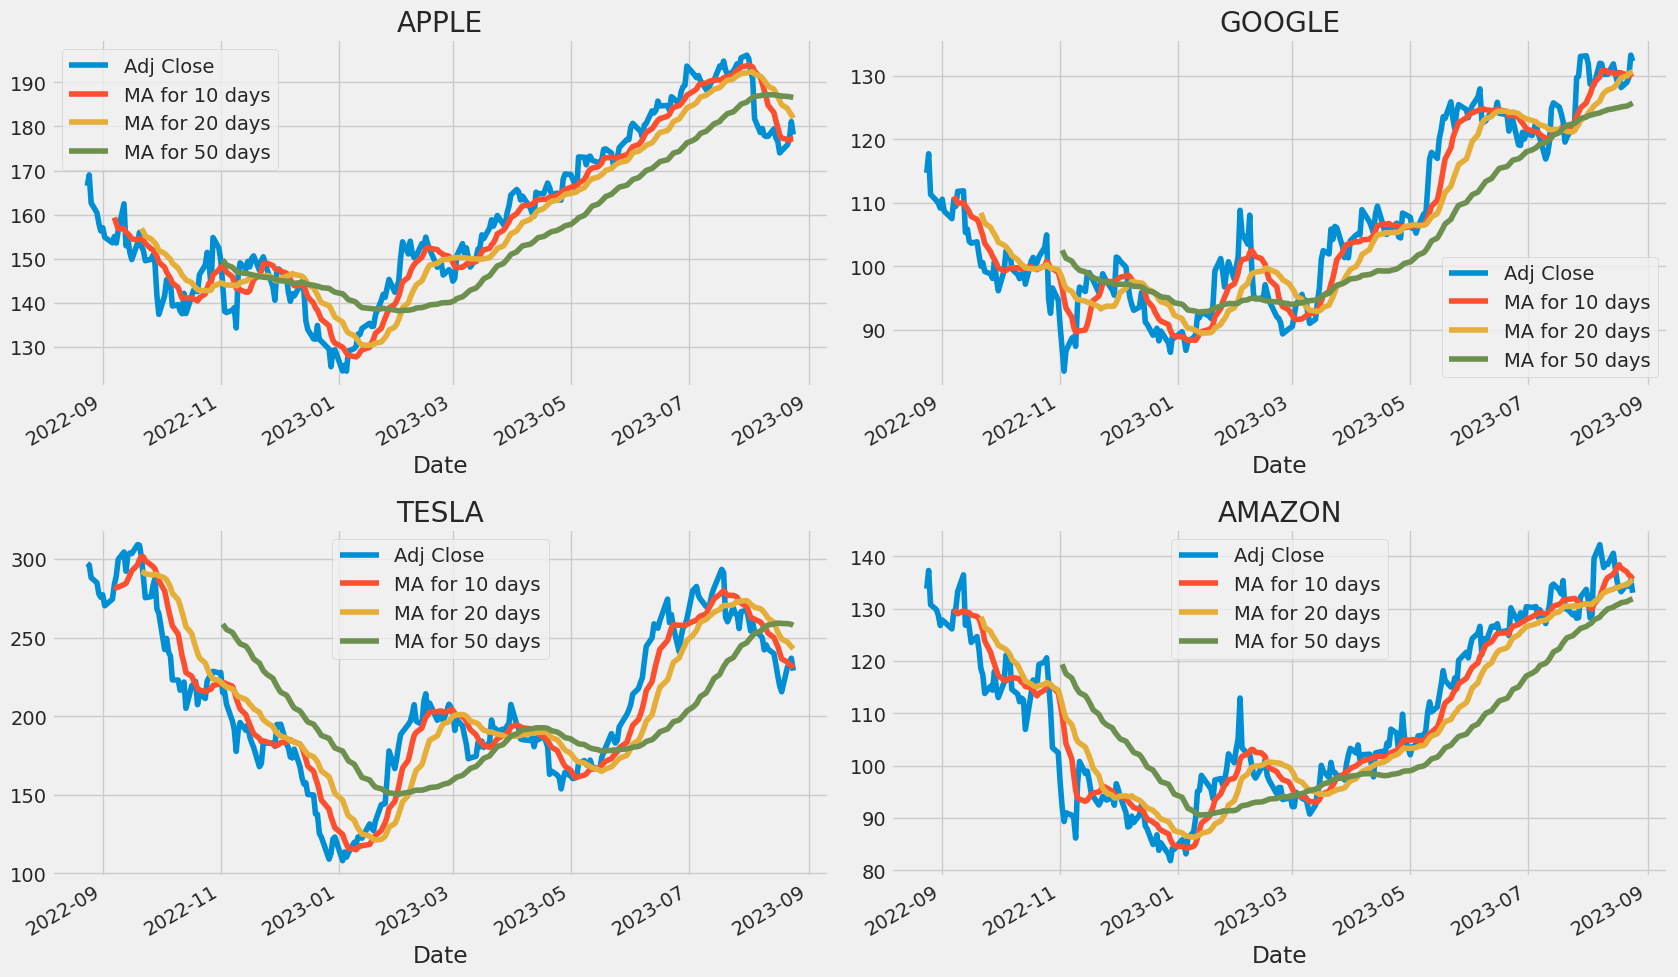

In [6]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(17)

company_list[0][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

company_list[1][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

company_list[2][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('TESLA')

company_list[3][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()
plt.show()

From the graph, it's clear that the moving average is most effective at 10 and 20 days. These periods capture significant trends while minimizing noise.


# 3. Average Daily Returns

Our focus now shifts to assessing stock risk. By analyzing daily changes using pandas, we'll retrieve and evaluate Apple's daily returns.

## Understanding Daily Returns

Daily returns provide insights into a stock's performance and volatility. They reflect daily value fluctuations, aiding risk assessment and decision-making. Analyzing relative changes rather than absolute values enhances our perspective.


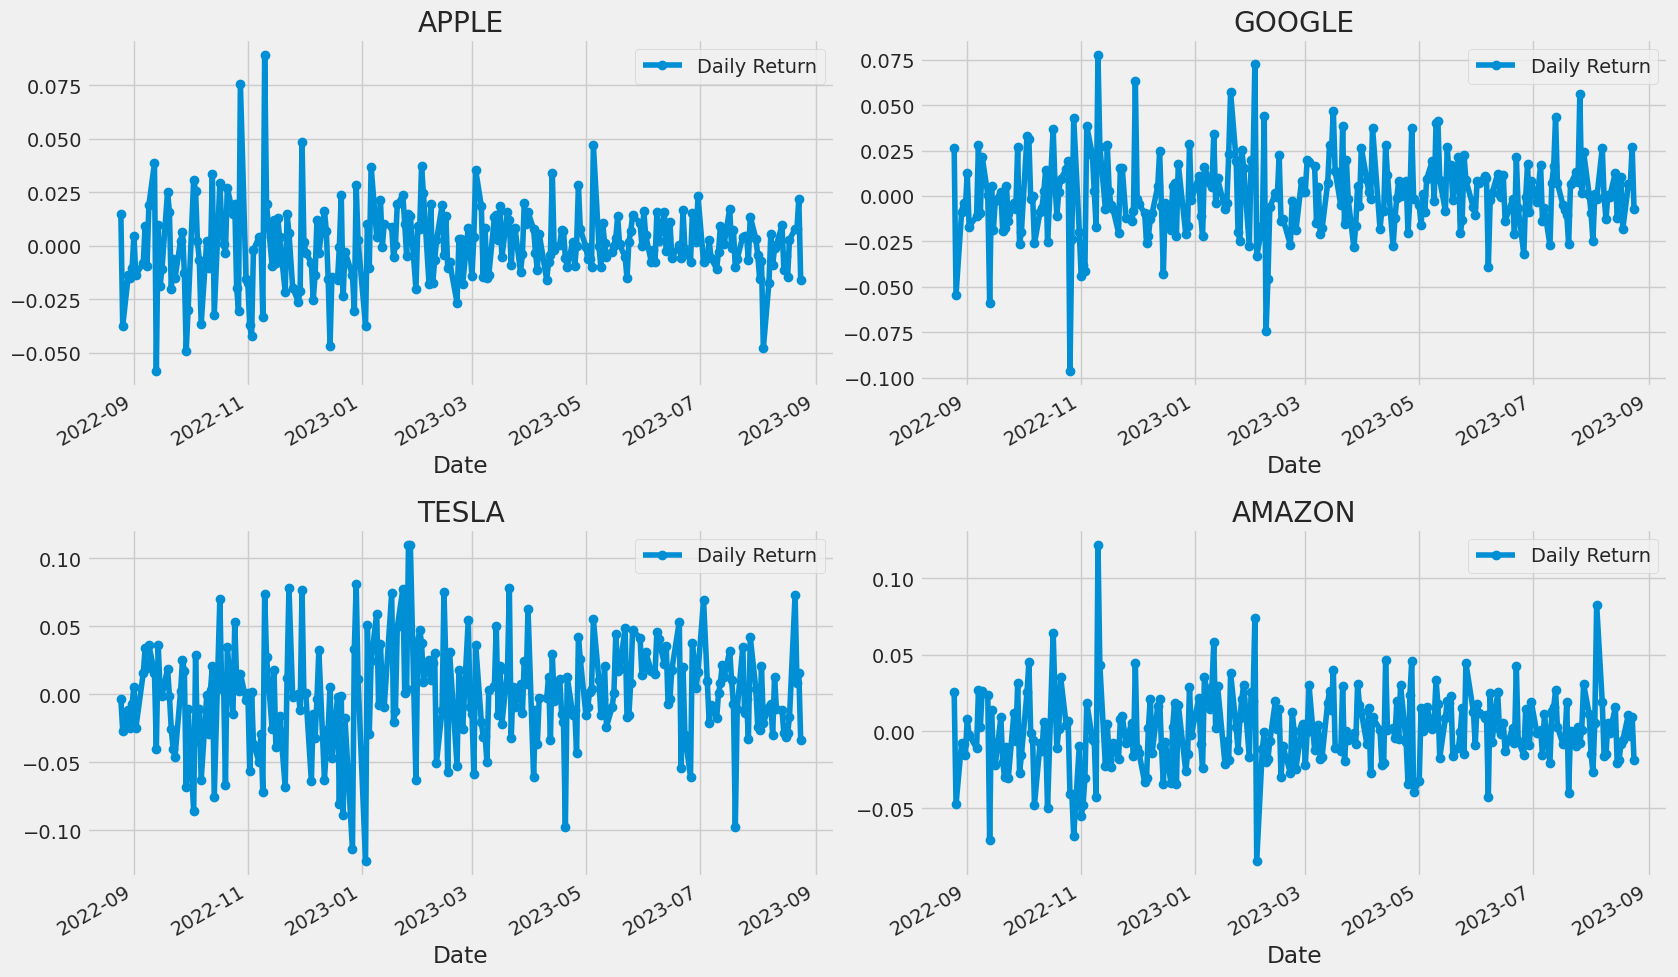

In [7]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(17)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='-', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='-', marker='o')
axes[0,1].set_title('GOOGLE')

TSLA['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='-', marker='o')
axes[1,0].set_title('TESLA')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='-', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

### Visualizing Average Daily Returns

To grasp the average daily returns comprehensively, we'll create a combined histogram. It will enables us to understand the distribution of average daily returns. The histogram showcases return frequency.


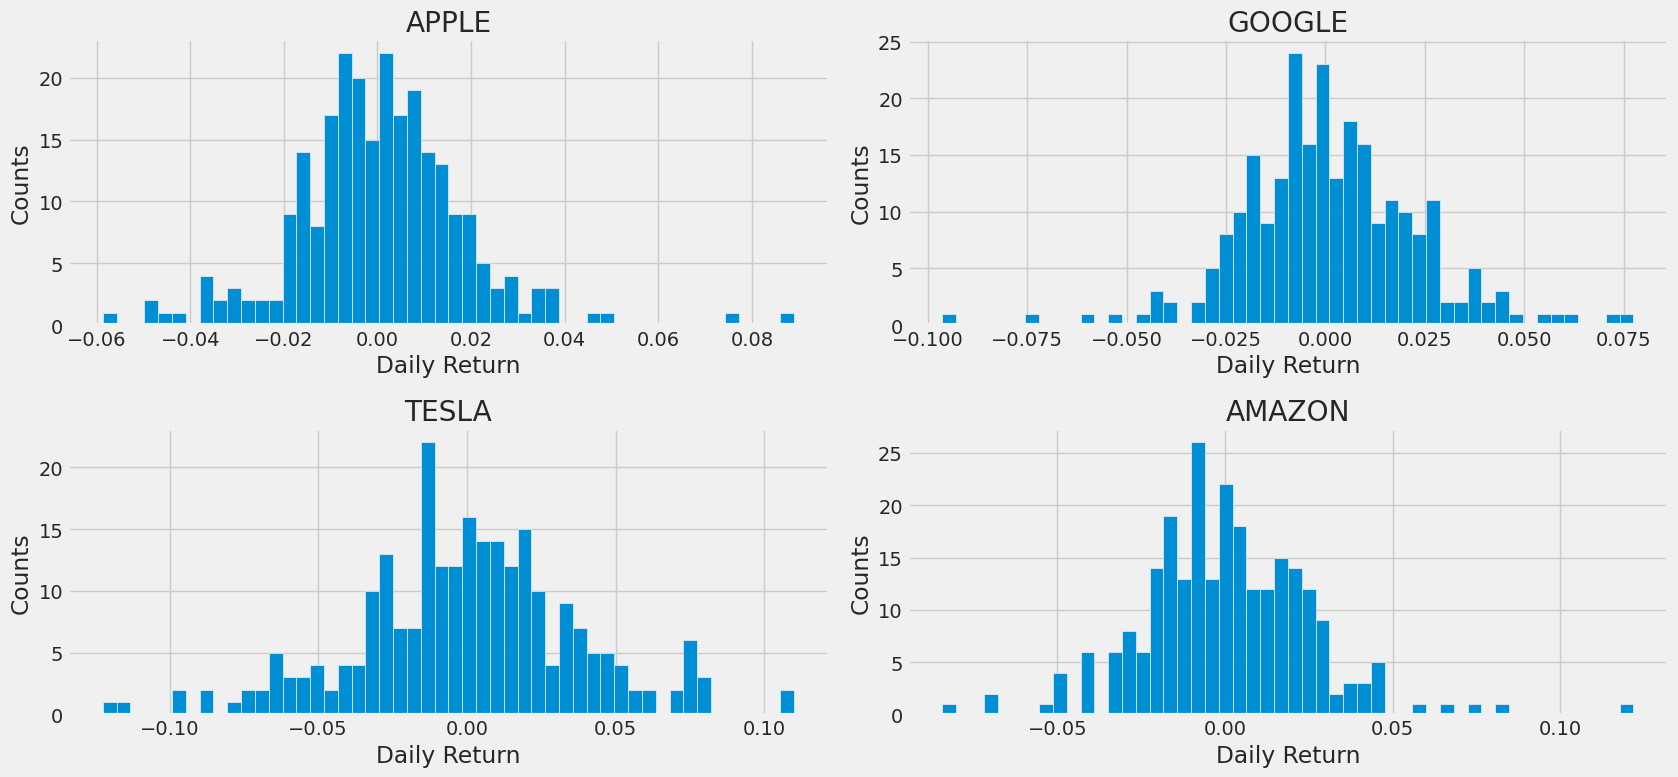

In [8]:
plt.figure(figsize=(17, 8))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

## 4. Correlation Among Different Stocks' Closing Prices

Correlation quantifies the relationship between variables, with values between -1.0 and +1.0. It measures association but doesn't determine causality or third factors.

To analyze returns for all stocks, we'll create a DataFrame consolidating the 'Close' columns. This step allows us to explore correlations among closing prices.


In [9]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,TSLA
Date,,,,
2022-08-24,NaN,NaN,NaN,NaN
2022-08-25,0.014923,0.026009,0.026155,-0.003456
2022-08-26,-0.037699,-0.047567,-0.054375,-0.026953
2022-08-29,-0.013690,-0.007342,-0.008625,-0.011351
2022-08-30,-0.015305,-0.008167,-0.003897,-0.024998


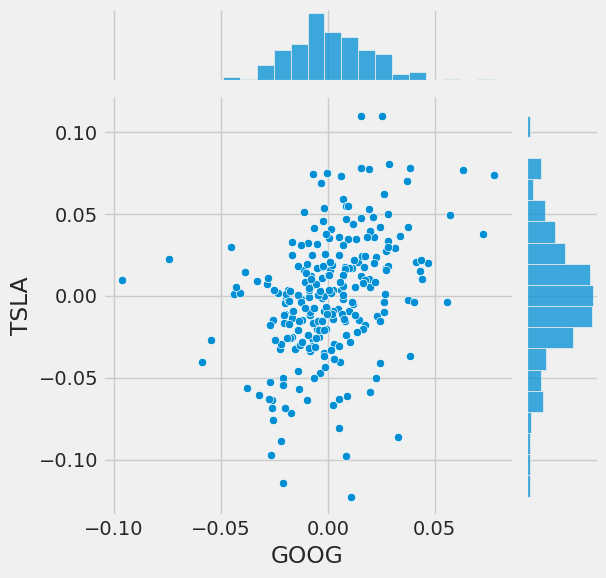

In [10]:
# We'll use joinplot to compare the daily returns of Google and Tesla
sns.jointplot(x='GOOG', y='TSLA', data=tech_rets, kind='scatter')

### Exploring Correlation Through Visualization

Perfectly positively correlated stocks will exhibit a linear relationship in daily return values, illustrating close alignment in movements.

Seaborn and pandas simplify our analysis by automating comparisons across all possible stock pairs using `sns.pairplot()`. This approach swiftly reveals correlations and relationships.

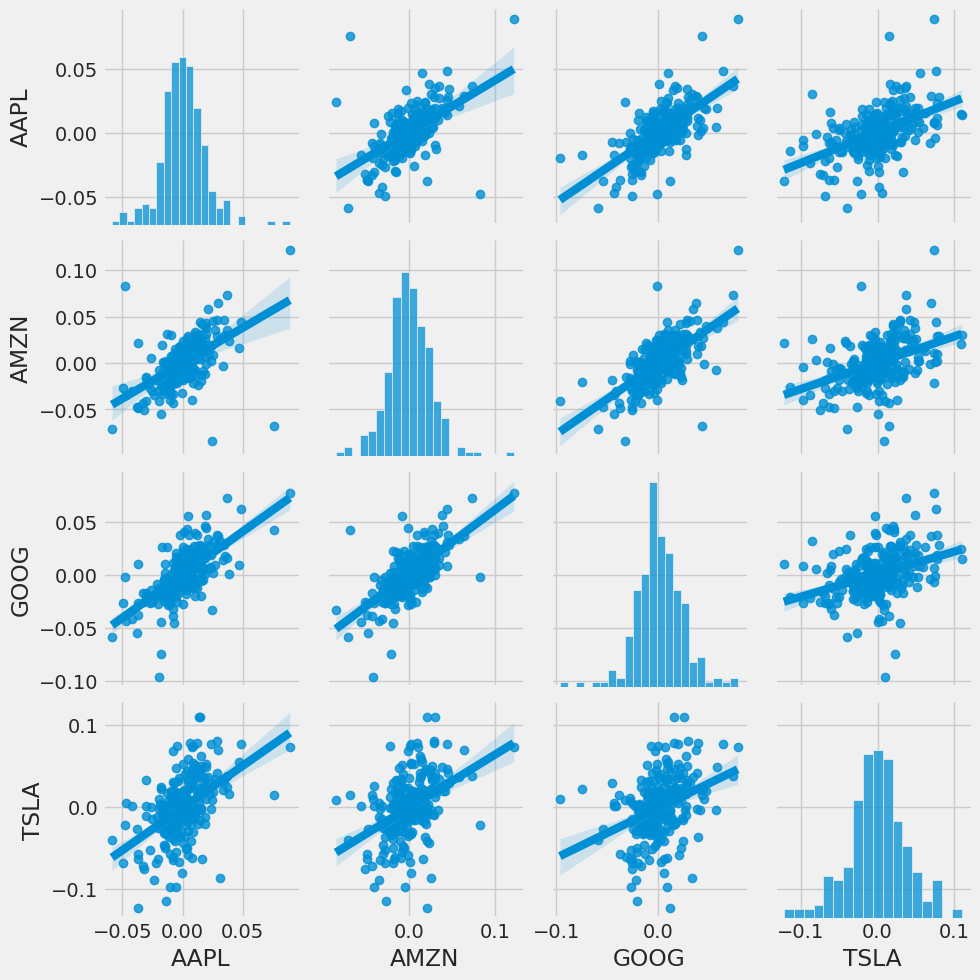

In [11]:
sns.pairplot(tech_rets, kind='reg')

## Exploring Daily Return Relationships

The visual overview above reveals daily return connections among all stocks. A notable correlation between Google and Amazon's daily returns piques interest, warranting a focused investigation.

While `sns.pairplot()` is convenient, we can enhance visualization using `sns.PairGrid()`. This method provides greater control over figure customization, including plot types.


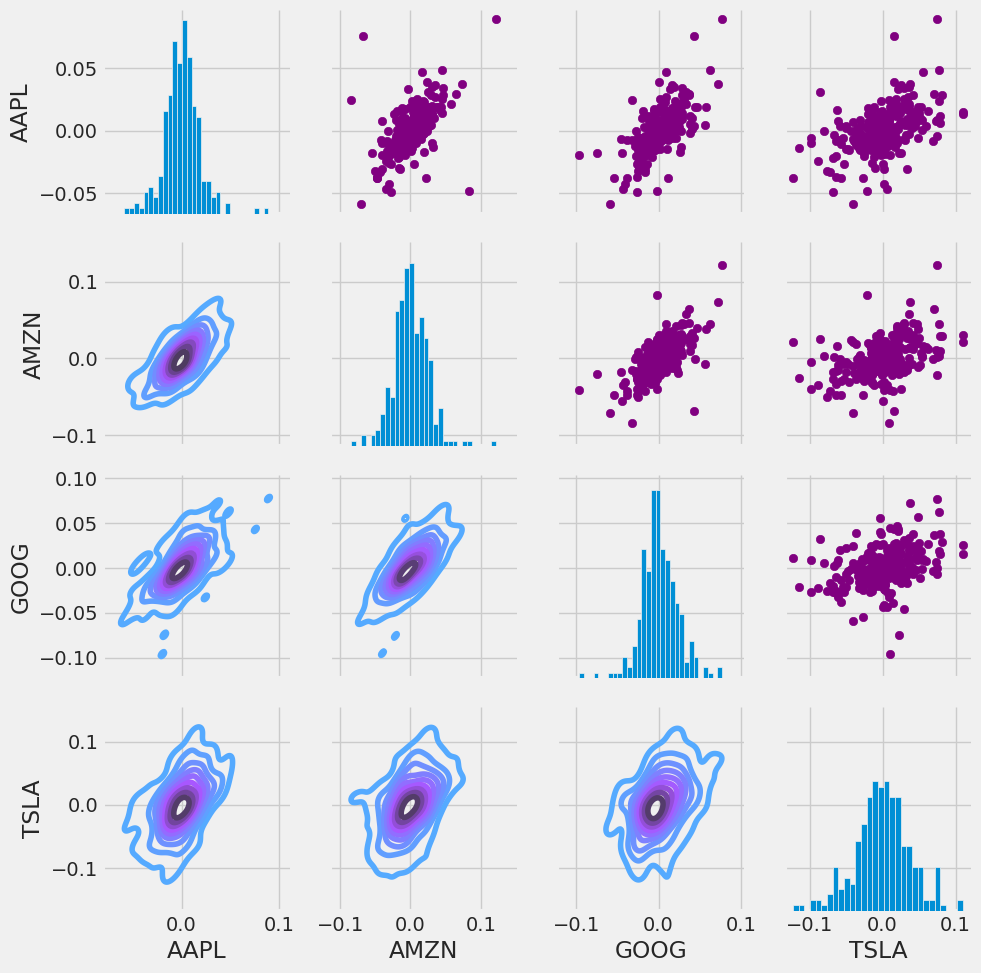

In [12]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

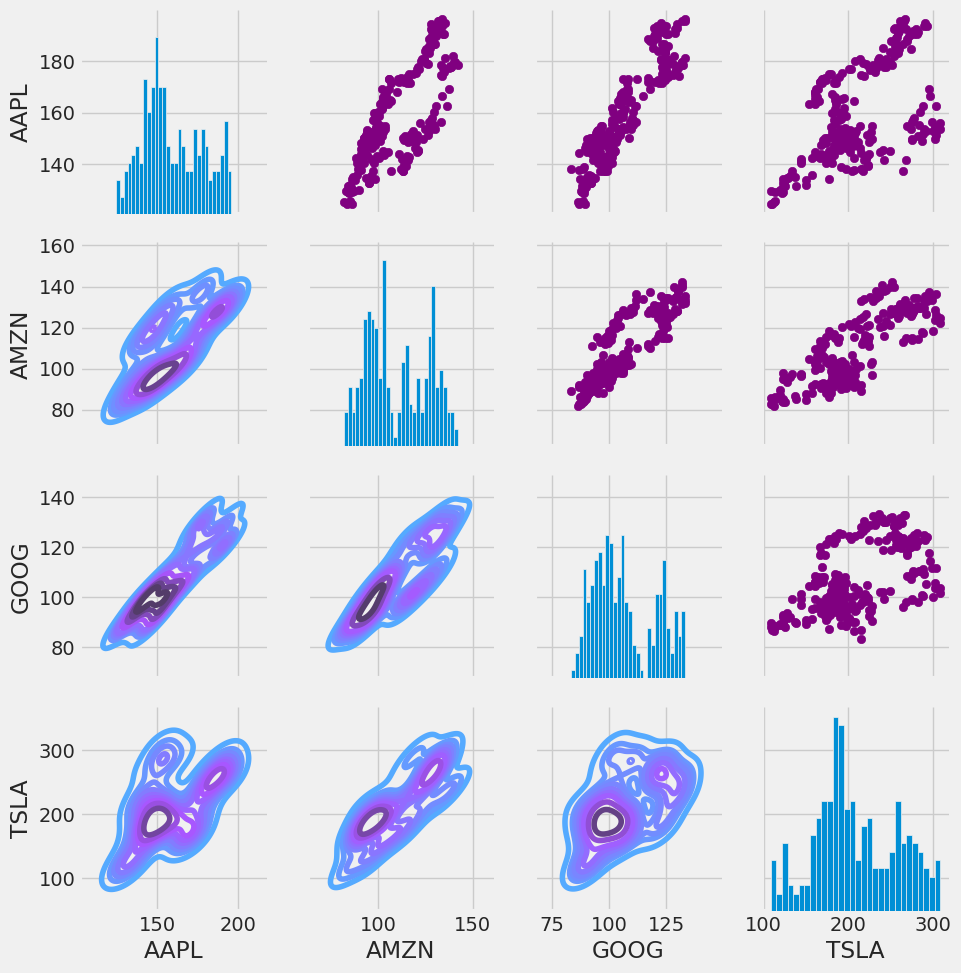

In [13]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

### Exploring Numerical Correlations

An interesting correlation emerges when comparing closing prices, particularly between Google and Apple. This observation sparks curiosity for deeper exploration.


Text(0.5, 1.0, 'Correlation of stock closing price')

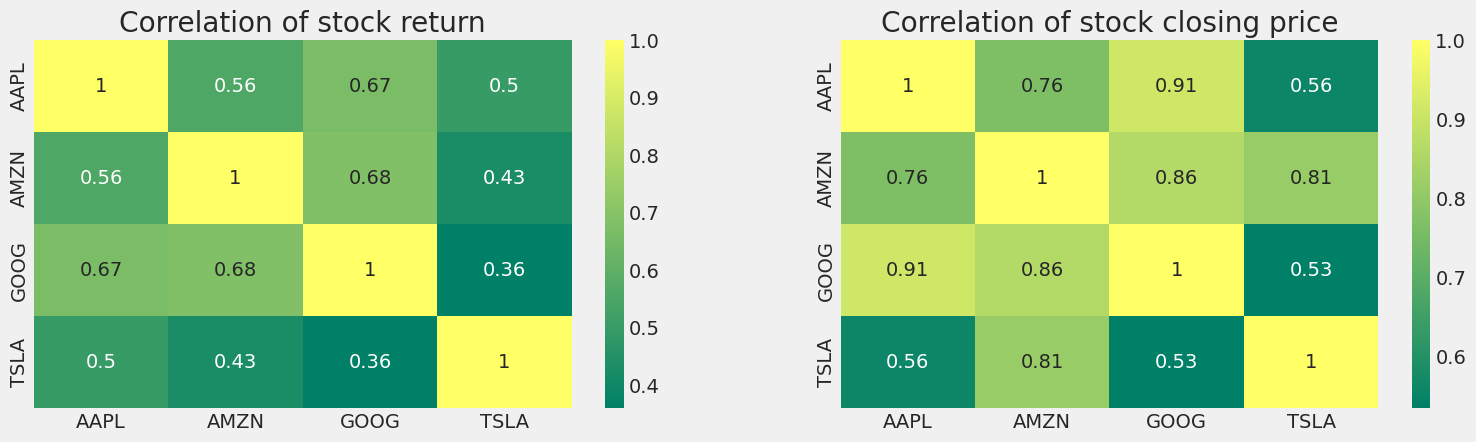

In [14]:
plt.figure(figsize=(17, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

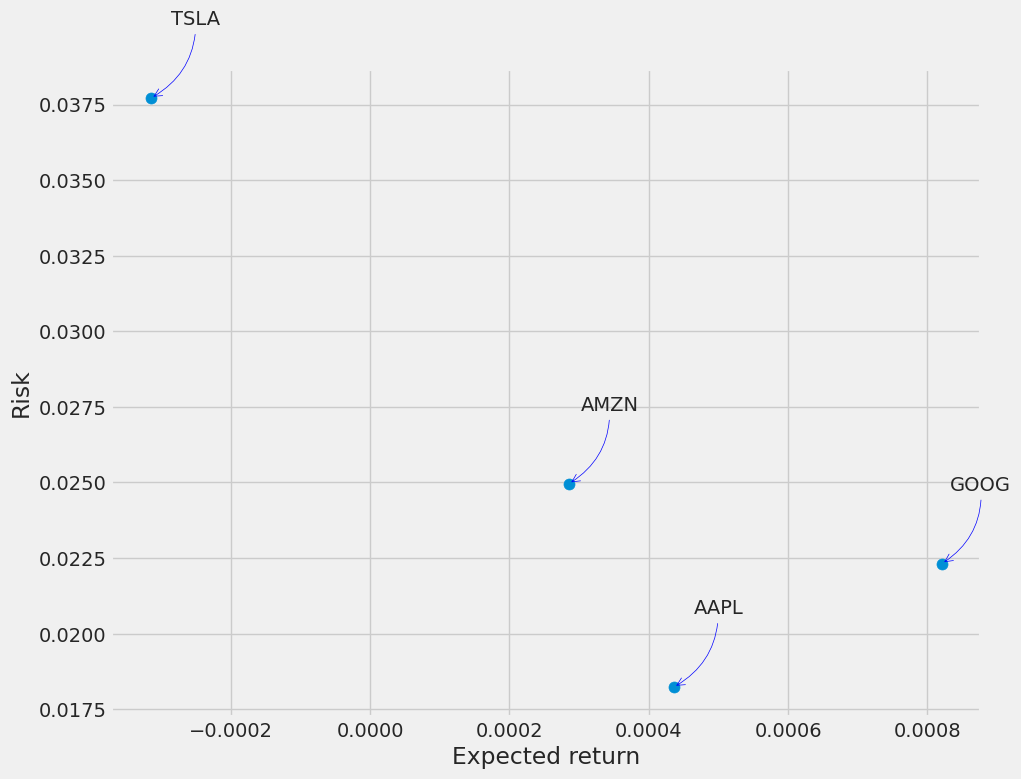

In [17]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='->', color='blue', connectionstyle='arc3,rad=-0.3'))

## Predicting Tesla Stock Prices with LSTM

In this section, we delve into predictive modeling using TensorFlow's LSTM. Our goal: forecast Tesla stock prices using Long Short-Term Memory, an adept choice for time series data.

### What is LSTM

LSTM, a specialized recurrent neural network, excels in capturing sequence patterns. Perfect for stock price prediction, it detects temporal dependencies and intricate trends.



In [31]:
# Get the stock quote
df = pdr.get_data_yahoo('TSLA', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000
...,...,...,...,...,...,...
2023-08-18,214.119995,217.580002,212.360001,215.490005,215.490005,135813700
2023-08-21,221.550003,232.130005,220.580002,231.279999,231.279999,135702700
2023-08-22,240.250000,240.820007,229.550003,233.190002,233.190002,130597900


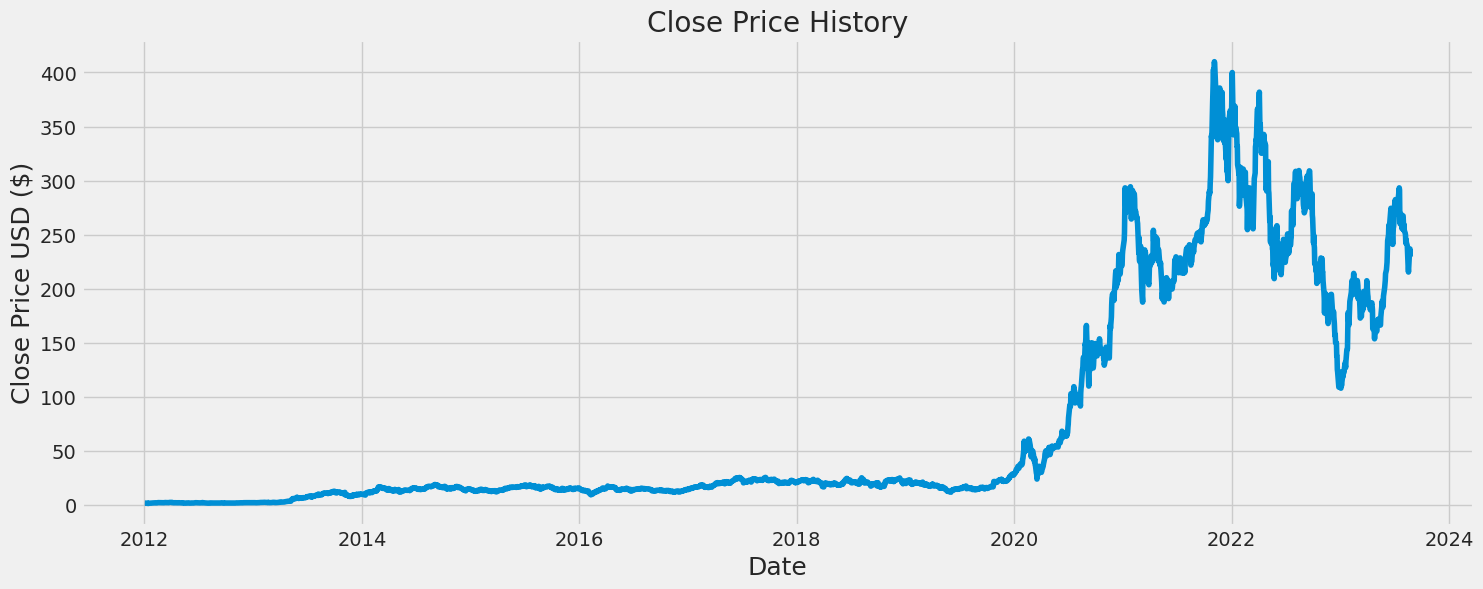

In [32]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [33]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2784

In [34]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00086343],
       [0.00080303],
       [0.00070674],
       ...,
       [0.56719376],
       [0.57617893],
       [0.55882066]])

In [35]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072796,
       0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
       0.00065614, 0.00064798, 0.00062186, 0.00064961, 0.0007557 ,
       0.00084547, 0.00100379, 0.00106745, 0.00110662, 0.00102501,
       0.00110825, 0.00121761, 0.00136451, 0.0014706 , 0.00143796,
       0.00149182, 0.00159791, 0.00135634, 0.00142   , 0.00169421,
       0.00176439, 0.00185906, 0.001988  , 0.00191129, 0.00186559,
       0.00191618, 0.00178887, 0.00176766, 0.00179867, 0.00173338,
       0.0018966 , 0.00183621, 0.00179214, 0.00168441, 0.00168605,
       0.00167789, 0.00195046, 0.00215775, 0.00217081, 0.00204023,
       0.0019929 , 0.00204513, 0.00198963, 0.00198637, 0.00201738,
       0.00189497, 0.00184274, 0.00238462, 0.00247276, 0.00245807])]
[0.0023731972591546557]

[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072796,
       0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
       0.00065614, 0.00064798, 0.

In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
2724/2724 [==============================] - 120s 43ms/step - loss: 0.0015
Epoch 2/10
2724/2724 [==============================] - 115s 42ms/step - loss: 6.3280e-04
Epoch 3/10
2724/2724 [==============================] - 114s 42ms/step - loss: 5.8375e-04
Epoch 4/10
2724/2724 [==============================] - 114s 42ms/step - loss: 4.2884e-04
Epoch 5/10
2724/2724 [==============================] - 114s 42ms/step - loss: 5.4508e-04
Epoch 6/10
2724/2724 [==============================] - 116s 42ms/step - loss: 3.3961e-04
Epoch 7/10
2724/2724 [==============================] - 114s 42ms/step - loss: 3.7619e-04
Epoch 8/10
2724/2724 [==============================] - 115s 42ms/step - loss: 3.3135e-04
Epoch 9/10
2724/2724 [==============================] - 116s 43ms/step - loss: 3.1146e-04
Epoch 10/10
2724/2724 [==============================] - 116s 42ms/step - loss: 3.2276e-04


In [38]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 37ms/step


7.324220137049487

<ipython-input-46-5989cfdc0115>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval['Predictions'] = predictions


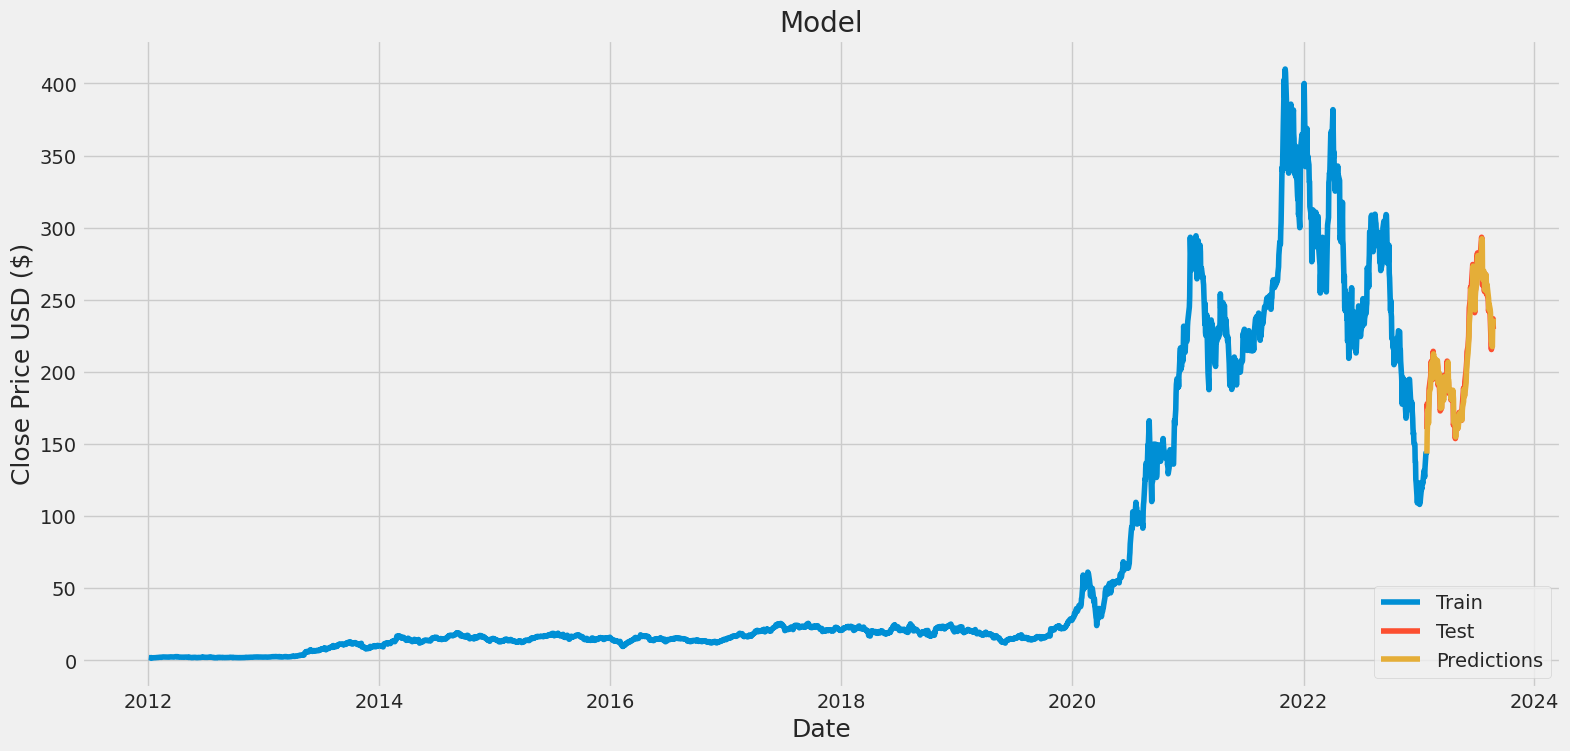

In [46]:
# Plot the data
train = data[:training_data_len]
eval = data[training_data_len:]
eval['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(17,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(eval[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

In [43]:
# Show the valid and predicted prices
eval

,Close,Predictions
Date,,
2023-01-26,160.270004,143.325867
2023-01-27,177.899994,158.257675
2023-01-30,166.660004,174.136078
2023-01-31,173.220001,164.298401
2023-02-01,181.410004,172.798676
...,...,...
2023-08-18,215.490005,221.374588
2023-08-21,231.279999,217.483582
2023-08-22,233.190002,231.924133


# Summary

In this notebook, we explored stock data, analysed it and built a prediction model to predict future closing values for TESLA, overall we learned:

- How to get stock information from YAHOO Finance using yfinance.
- Ways to look at and show data using tools like Pandas, Matplotlib, and Seaborn.
- How to find connections between different stocks.
- How to measure the risk of investing in a stock.
- A glimpse into predicting stock prices using TensorFlow's LSTM.

These insights help us understand stock markets better, make smarter decisions, and use data for improved investment strategies.

Keep your curiosity alive in the world of financial data analysis and prediction.
